In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv("Salary_Data_Based_country_and_race.csv")

In [4]:
data.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [6]:
data.drop("Unnamed: 0",axis=1 ,inplace =True)

In [7]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [8]:
data.dropna(axis=0 ,inplace=True)

In [9]:
data.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

In [10]:
data.dropna(axis=0 ,inplace=True)

In [11]:
data["Age"]=data["Age"].astype(int)
data["Salary"]=data["Salary"].astype(int)

In [12]:
data["Education Level"]= data["Education Level"].replace({"Bachelor's":"Bachelor's Degree","Master's":"Master's Degree","phD":"PhD"})
print(data["Education Level"].value_counts())

Education Level
Bachelor's Degree    3021
Master's Degree      1860
PhD                  1369
High School           448
Name: count, dtype: int64


In [13]:
data["Country"].value_counts()

Country
USA          1359
China        1343
Australia    1336
UK           1335
Canada       1325
Name: count, dtype: int64

In [14]:
data["Job Title"].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64

In [15]:
def categorize_job_title(job_title):
 job_title = str(job_title).lower()
 if 'software' in job_title or 'developer' in job_title:
      return 'Software/Developer'
 elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
     return 'Data Analyst/Scientist'
 elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
     return 'Manager/Director/VP'
 elif 'sales' in job_title or 'representative' in job_title:
     return 'Sales'
 elif 'marketing' in job_title or 'social media' in job_title:
     return 'Marketing/Social Media'
 elif 'product' in job_title or 'designer' in job_title:
     return 'Product/Designer'
 elif 'hr' in job_title or 'human resources' in job_title:
     return 'HR/Human Resources'
 elif 'financial' in job_title or 'accountant' in job_title:
     return 'Financial/Accountant'
 elif 'project manager' in job_title:
     return 'Project Manager'
 elif 'it' in job_title or 'support' in job_title:
     return 'IT/Technical Support'
 elif 'operations' in job_title or 'supply chain' in job_title:
     return 'Operations/Supply Chain'
 elif 'customer service' in job_title or 'receptionist' in job_title:
     return 'Customer Service/Receptionist'
 else:
     return 'Other'
data['Job Title'] = data['Job Title'].apply(categorize_job_title)

In [16]:
data["Job Title"].value_counts()

Job Title
Software/Developer               2024
Manager/Director/VP              1766
Data Analyst/Scientist           1323
Other                             663
Sales                             337
Marketing/Social Media            195
HR/Human Resources                191
Product/Designer                  110
Customer Service/Receptionist      58
IT/Technical Support               15
Financial/Accountant               11
Operations/Supply Chain             5
Name: count, dtype: int64

In [17]:
data.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


# Exploratory Data Analysis
#In the exploratory data analysis, I will be looking at the data and try to understand the data. I will begin by looking at the distribution of data across the datset,followed by visualizing the data to understand the relationship between the features and the target variable.

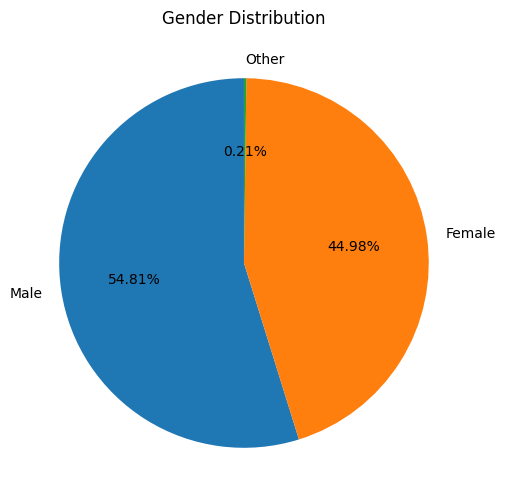

In [18]:
plt.figure(figsize=(10,6))
plt.pie(data['Gender'].value_counts(), labels=['Male','Female', 'Other'], autopct='%1.2f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

The pie chart shows that majority of the employees are male with 54.8 % on the dataset, followed by females with 45% and 0.2% employees belong to other gender.

### Age Distribution

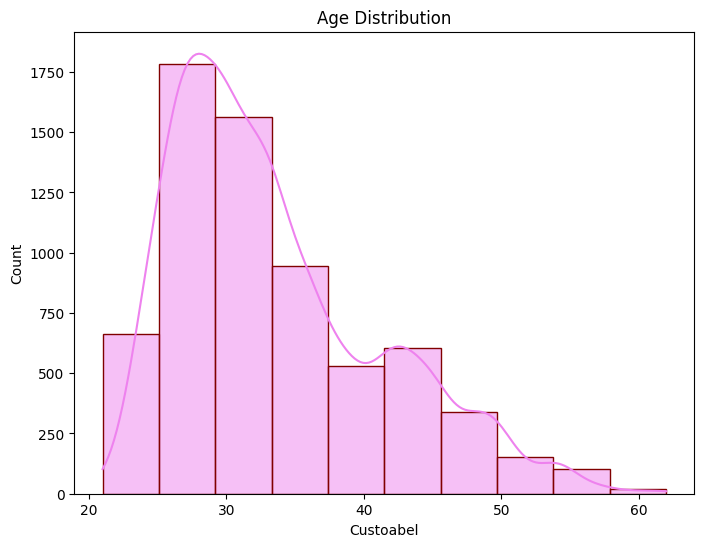

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age',bins= 10,kde= True ,color='violet',edgecolor='maroon')
plt.title('Age Distribution')
plt.xlabel('Custoabel') 
plt.show()

Majority of the employees are in the range of 25 - 35 years of age, which means majority of the employees are young and energetic. There is only minimal number of old employees in the dataset having age more than 55 years.

Education Level

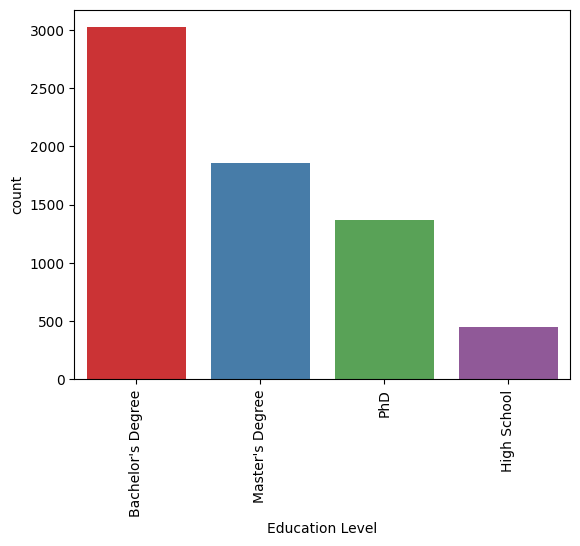

In [20]:
sns.countplot(x = 'Education Level', data = data, palette='Set1')
plt.xticks(rotation=90)
plt.show()

Most of the employees have a Bachelor's degree followed by Master's degree and Doctoral degree. The least number of employees have a High School education. From the graph it is clear that most of the employees started working after graduation, few of them started working after post graduation and very few of them have gone for doctorate. The least number of employees have started working after high school education.

### Job Title


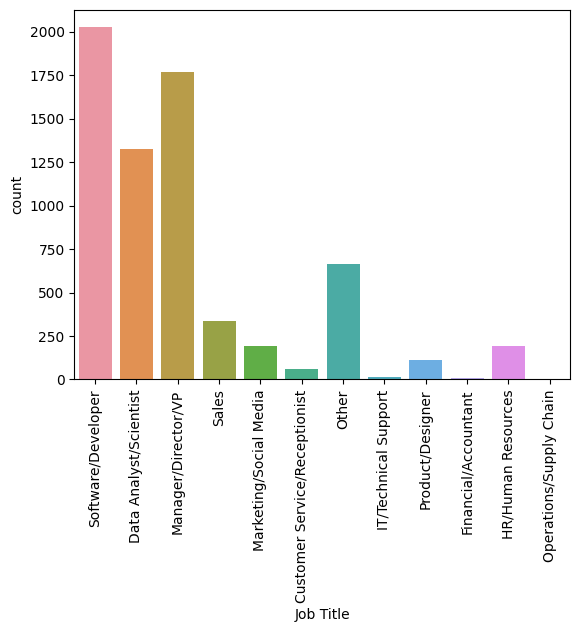

In [21]:
sns.countplot(x='Job Title', data = data)
plt.xticks(rotation=90)
plt.show()

This graph helps us to breakdown the data of job title in a simpler form. From the graph, it is clear that majority of the employees have job titles - Software Developer, Data Analyst/Scientist or Manager/Director/Vp. Few amount of employees have job titles such as sales, marketing/social media, HR, Product Designer and Customer Service. Very few of the eomployees work as a Financial/accountant or operation/supply management.

From this I build a hypothesis that the job titles such as Software Developer, Data Analyst/Scientist and Manager/Director are in more demand as compared to other job titles. It also means that job titles like Financial/accountant or operation/supply management and Customer Service are in less demand and paid comparatively less.

## Years of Experience

<Axes: xlabel='Years of Experience', ylabel='Count'>

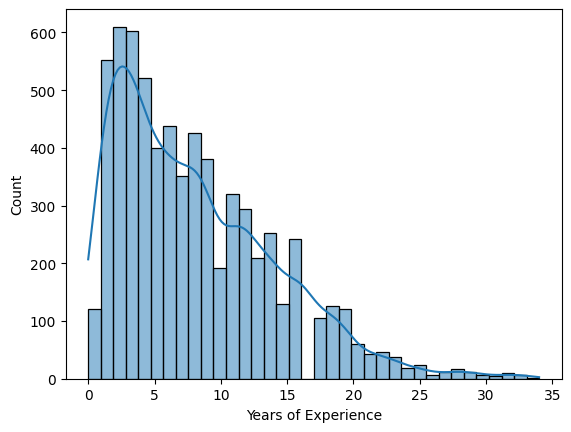

In [22]:
sns.histplot(x = 'Years of Experience', data = data,kde=True)

Most of the employees in the dataset havr experience of 0-7 years in the respective domains in which particularly majority of them have experience between less than 5 years. Moreover the number of employees in the dataset decreases with increasing number of years of experience.

### Country

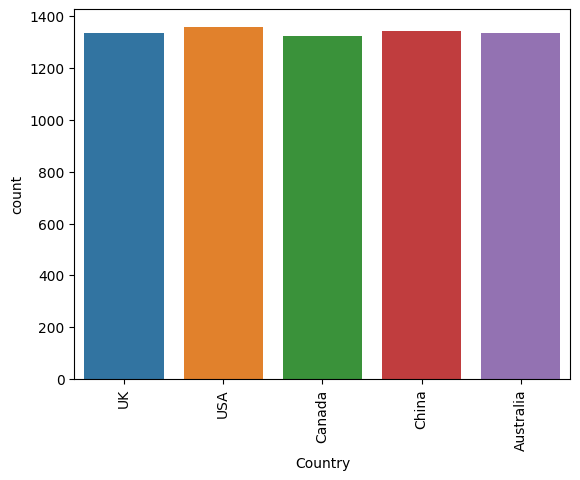

In [23]:
sns.countplot(x='Country', data=data)
plt.xticks(rotation=90)
plt.show()

The number of employees from the above 5 countries is nearly same, with a little more in USA.

### Racial Distribution

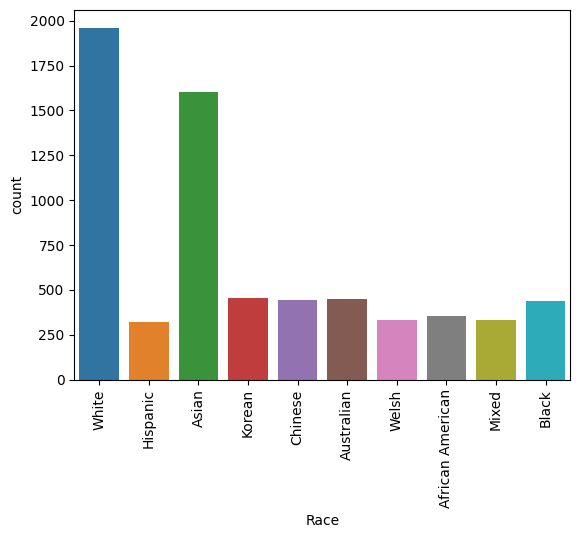

In [24]:
sns.countplot(x='Race', data=data)
plt.xticks(rotation=90)
plt.show()

This graph help us to know about the racial distribution in the dataset. From the graph, it is clear that most of the employees are either White or Asian, followed by Korean, Chinese, Australian and Black. Number of employees from Welsh, African American, Mixed and Hispanic race are less as compared to other groups.

From all the above plots and graphs, we can a understanding about the data we are dealing with, its distribution and quantity as well. Now I am gonna explore the realtion of these independent variables with the target Variable i.e. Salary.

Age and Salary

Text(0.5, 1.0, 'Age vs Salary')

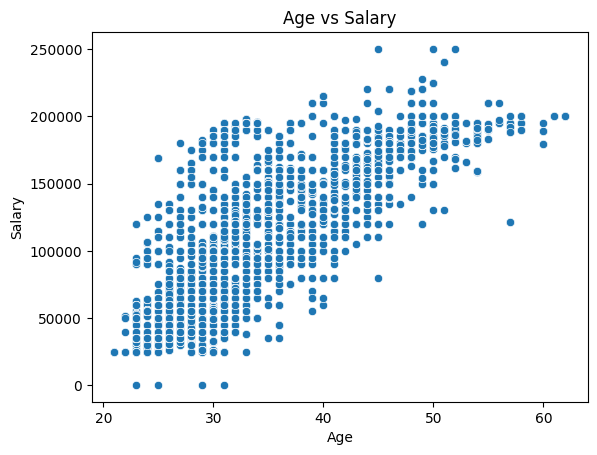

In [25]:
sns.scatterplot(x = 'Age', y='Salary', data=data)
plt.title('Age vs Salary')

In this scatter plot we see a trend that the salary of the person increases with increse in the age, which is obvious because of promotion and apprisals. However upon closer observation we can find that similar age have multiple salaries, which means there are other factors which decides the salary.

### Gender and Salary

Text(0.5, 1.0, 'Gender vs Salary')

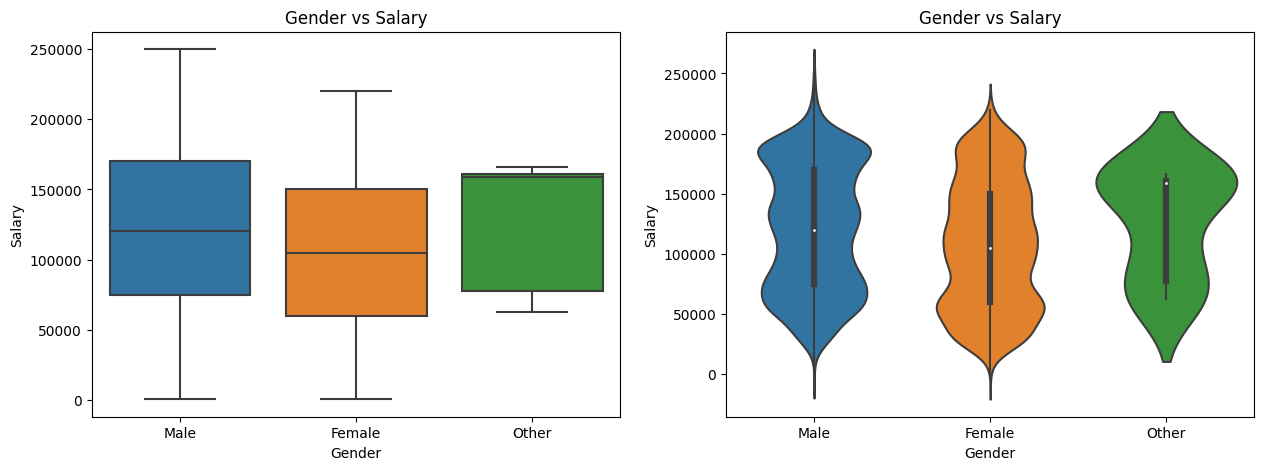

In [26]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
sns.boxplot(x = 'Gender', y='Salary', data = data, ax =ax[0]).set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y='Salary', data = data, ax =ax[1]).set_title('Gender vs Salary')

The boxplot and violinplot describes the salary distribution among the three genders. In the boxplot the employees from Other gender has quite high salary as compared to Makes and Females. The other gender employees have a median salary above 150000, followed by males with median salary near 107500 and females with median salary near 100000. The voilin plot visualizes the distribution of salary with respect to the gender, where most of the Other gender employees have salary above 150000. In makes this distribution is concentrated between 50000 and 10000 as well as near 200000. In case of females, there salary distribution is quite spread as compared to other genders with most near 50000.

### Education Level and Salary

Text(0.5, 1.0, 'Education Level vs Salary')

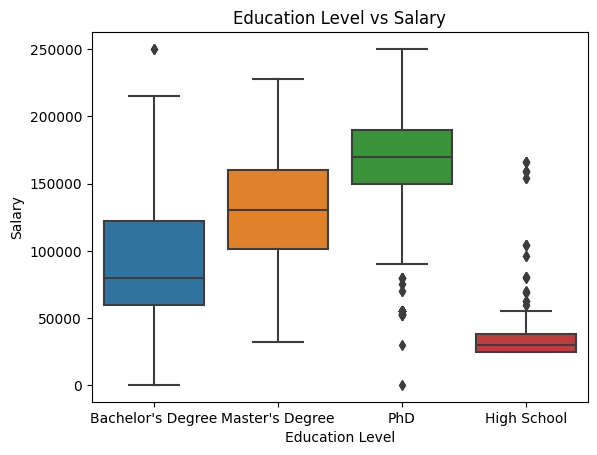

In [27]:
sns.boxplot(x = 'Education Level', y = 'Salary', data = data).set_title('Education Level vs Salary')

The boxplot and violinplot shows the distribution of salary based on the employees education level. The median salary for the Phd holders is highest followed by Masters and bachelors degreee holders, with employees with no degree having the lowest median salary. In the violinplot the phd scholars have distribution near 200000, whereas Masters degree holders have a very sleak distribution where the salary distribution is spread from 100k to 150k, The Bachelors degree holders have a salary distribution near 50000 whereas the employees with no degree have a salary distribution near 40k-45k.

From these graph, I assume that the employees with higher education level have higher salary than the employees with lower education level.

### Job Title and Salary

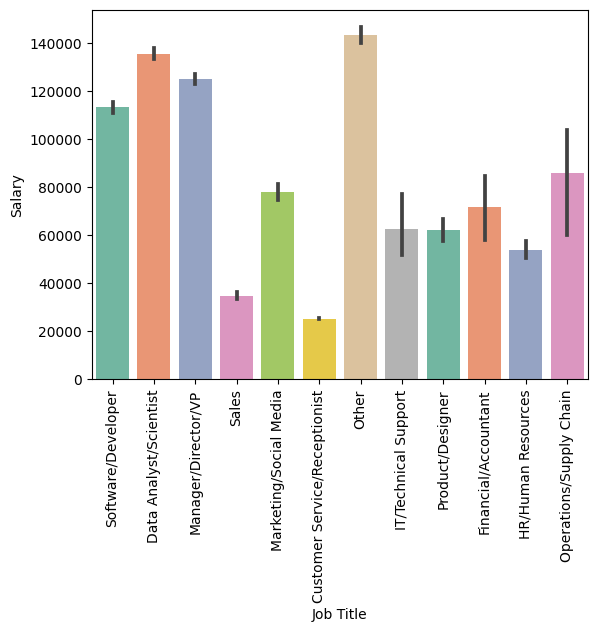

In [28]:
sns.barplot(x = 'Job Title', y = 'Salary', data = data, palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

This graph falsifies my previous hypothesis regarding the demand and paywith respect to job titles. In this graph, 'Other' category job titles have higher salary than those titles which assumed to be in high demand and pay. In contrast to previous Job title graph, this graph shows that there is no relation between the job title distribution and salary. The job titles which gave high salary are found to be less in number.

However the hypothesis is true about the Job titles such as Software Developer, Data analyst/scuentust and Manager/Director/VP. These job titles are found to be in high demand and pay. But in contrast to that the job titles such as Operation/Supply chain, HR, Financial/Accountant and Marketing/Social Media are found have much more salary as assumed.

### Experience and Salary

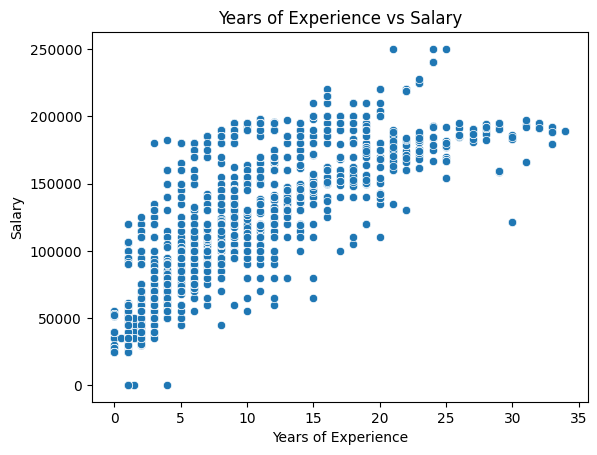

In [29]:
sns.scatterplot(x= 'Years of Experience', y  = 'Salary', data = data).set_title('Years of Experience vs Salary')
plt.show()

From this scaaterplot, it is clear that on the whole, the salary of the employees is increasing with the years of experience. However, on closer look we can see that similar experience have different salaries. This is because the salary is also dependent on other factors like job title, age, gender education level as discussed earlier.

### Country and Salary

<Axes: xlabel='Country', ylabel='Salary'>

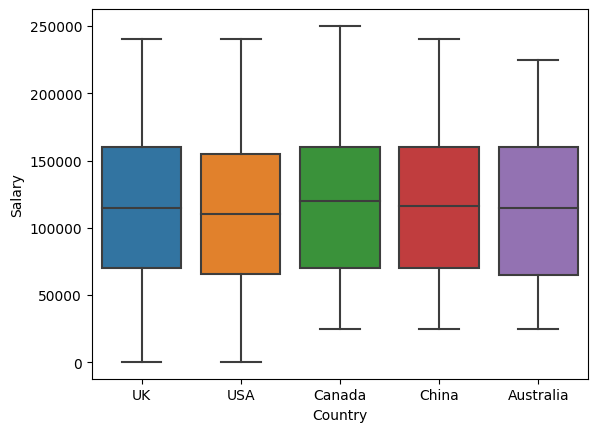

In [30]:
sns.boxplot(x = 'Country', y = 'Salary', data = data)


Both the boxplot and violinplot shows very similar insight about the salary across all the countiries even in the violinplot distribution. However, there is very small variation in median salary in USA, which is slighlty less as compared to other countries.

Since, the we cannot get much information about the salary with respect to the countries. So, I will plot the job title vs salary graph for each country, so that we can get a overview of job title vs salary for each country.

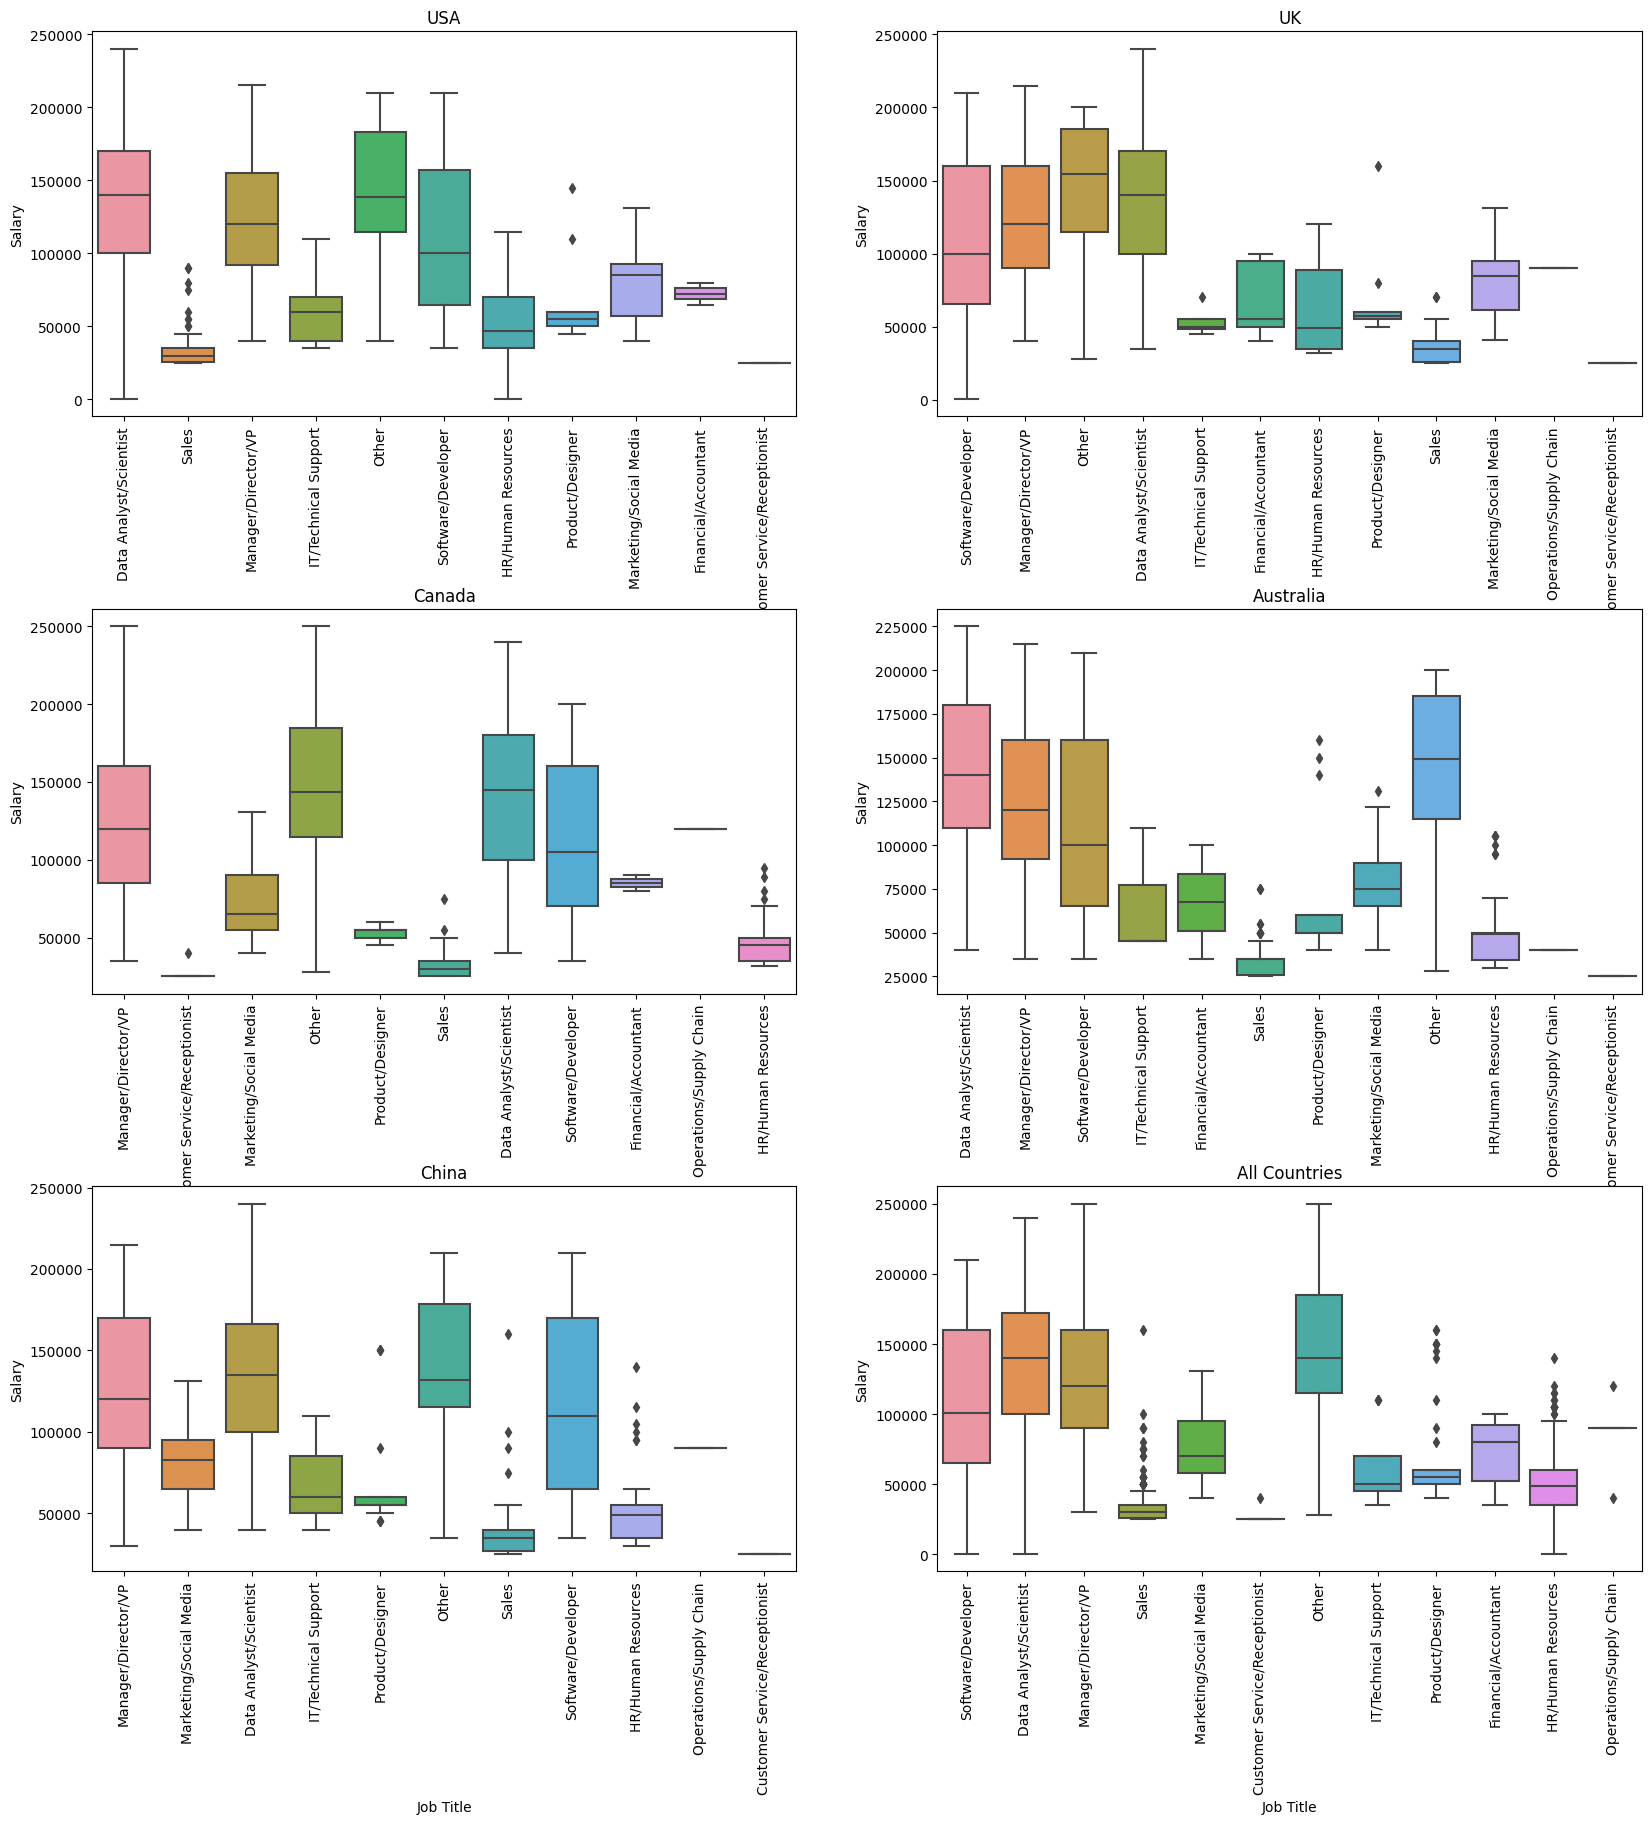

In [31]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
sns.boxplot(x = 'Job Title', y = 'Salary', data = data[data['Country'] == 'USA'], ax = ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = data[data['Country'] == 'UK'], ax = ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = data[data['Country'] == 'Canada'], ax = ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = data[data['Country'] == 'Australia'], ax = ax[1,1]).set_title('Australia')
ax[1,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = data[data['Country'] == 'China'], ax = ax[2,0]).set_title('China')
ax[2,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = data, ax = ax[2,1]).set_title('All Countries')
ax[2,1].tick_params(axis='x', rotation=90)

After observing all these plots, I conclude that the Job Titles such as Softwarre Developer, Manager/Director/VP and Data Analyst/Scientist hare in high demand as well as receive much higer salary than other job titles, excluding the Job Titles that come under 'Other' category. The job titles such as Operation/Supply Chain, Customer Service/Receptionist, Product Designer and sales are in low demand and have low salary.


### Race and Salary

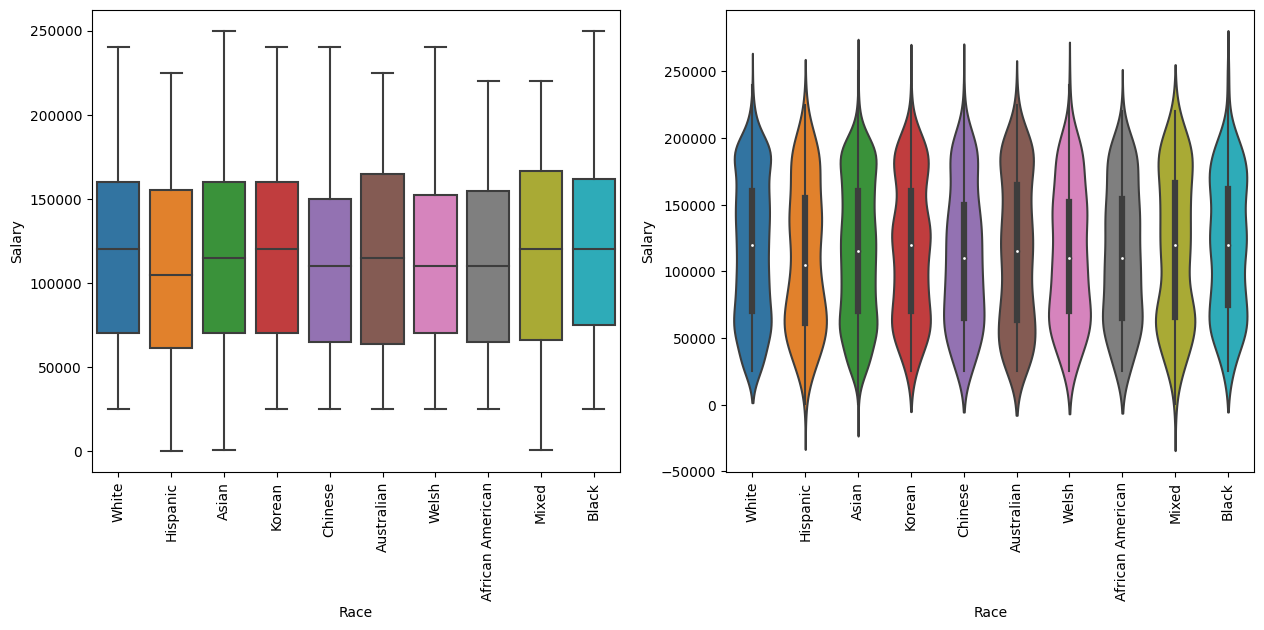

In [32]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Race', y = 'Salary', data = data, ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)
sns.violinplot(x = 'Race', y ='Salary', data = data, ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)

After observing all these plots, I conclude that the Job Titles such as Softwarre Developer, Manager/Director/VP and Data Analyst/Scientist hare in high demand as well as receive much higer salary than other job titles, excluding the Job Titles that come under 'Other' category. The job titles such as Operation/Supply Chain, Customer Service/Receptionist, Product Designer and sales are in low demand and have low salary.

## Data Preprocessing 2

### Label encoding to categorical features

In [33]:
from sklearn.preprocessing import LabelEncoder
features = ['Gender','Country','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
    le.fit(data[feature].unique())
    data[feature] = le.transform(data[feature])
    print(feature, data[feature].unique())

Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


### Normalization   

In [34]:
#normalizing the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(data[['Age', 'Years of Experience', 'Salary']])

In [35]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,0,11,-0.510769,-0.479849,3,9
1,-0.738393,0,2,1,-0.840811,-0.953461,4,5
2,1.493980,1,3,5,1.139440,0.656819,1,9
3,0.312135,0,0,10,-0.180727,-1.048183,4,5
4,2.413192,1,2,5,1.964544,1.604042,4,1


## Coorelation Matrix Heatmap

<Axes: >

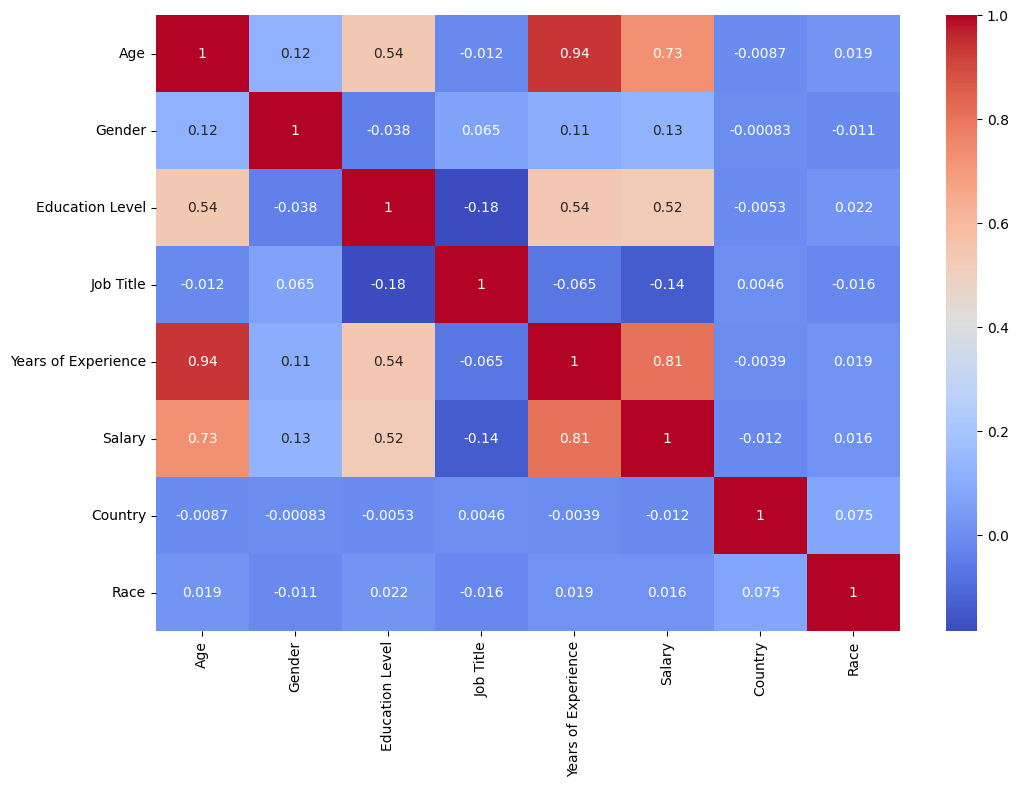

In [36]:
#coorelation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')


In this coorelation matrix, there are three major coorealtions.
- Salary and Age
- Salary and Years of Experience
- Years of Experience and Age

The coorelation salary with age and years of experience is already explored in the above plots. The coorelation between the years of experience and age is obvious as the person ages the experience will be more.

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop({'Salary'}, axis=1), data['Salary'], test_size=0.3, random_state=42)

In [38]:
def correlation(data ,threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)): 
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr.corr_matrix.columns[i]
                col_corr.add(colname)
        return col_corr

In [39]:
corr_features= correlation (X_train, 0.70) 
len(set(corr_features))

0

### Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()

In [41]:
#trainig the model
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
#training accuracy
rfg.score(X_train, y_train)

0.9889839984119638

In [43]:
#predicitng salary of the employee
r_pred = rfg.predict(X_test)

## Evaluating Random Forest Regressor Model

In [44]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.656819,0.651925
1,-0.745659,-0.616279
2,-0.290405,-0.376034
3,-1.048183,-1.048499
4,-0.669294,-0.652402
5,1.414598,1.498711
6,-0.820850,-0.810667
7,-1.142906,-1.113409
8,1.509320,1.531903
9,0.277930,0.312651


C:\Users\santo\AppData\Local\Temp\ipykernel_7716\174021283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dfr['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
C:\Users\santo\AppData\Local\Temp\ipykernel_7716\174021283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwask

<Axes: xlabel='Predicted', ylabel='Density'>

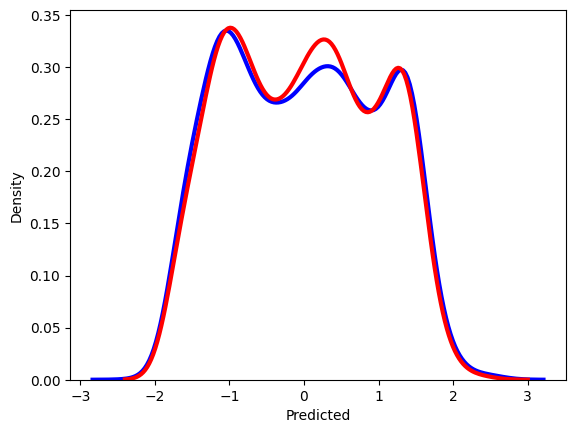

In [45]:
ax = sns.distplot(dfr['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dfr['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

In [46]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9412307057796395
Mean Squared Error:  0.05987648410119023
Mean Absolute Error:  0.1196602467535574
RMSE: 0.24469671861549397


The blue shows the distribution count for actual values and the red line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

## Conclusion

From the exploratory data analysis, I have concluded that the salary of the employees is dependent upon the following factors:
1. **Years of Experience**
2. **Job Title**
3. **Education Level**

Employees with greater years of experience, having job title such as Data analyst/scientist, Software Developer or Director/Manager/VP and having a Master's or Doctoral degree are more likely to have a higher salary.

Coming to the machine learning models, I have used Random Forest Regressor for predicting the salary. The Random Forest Regressor has performed well with the accuracy of 94.6%